In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
from geopy.geocoders import Nominatim

pd.set_option('display.max_columns', None)

#### Start date and an End date is needed to get weather data for that date range
#### The data will be used in training our model

In [2]:
start_date = input("Enter start date in format yyyy/mm//dd")
end_date = input("Enter end date in format yyyy/mm//dd")

start_date = start_date.replace('/', '')
end_date = end_date.replace('/', '')

Enter start date in format yyyy/mm//dd2015/01/01
Enter end date in format yyyy/mm//dd2022/12/29


In [3]:
address = input("Enter location in the format city/state")

Enter location in the format city/stateIsolo, Lagos


In [4]:
geolocator = Nominatim(user_agent="AI")
location = geolocator.geocode(address)
print(location.address)
print(location.latitude, location.longitude)
latitude = location.latitude
longitude = location.longitude

Isolo, Oshodi/Isolo, Lagos, 100263, Nigeria
6.5291605 3.3217235


#### We will be using the NASA weather API
#### The weather parameter are: Max and Min Temp, Rel. Humidity, precipitation, surface pressure and Wind speed at 10 meter range 

In [5]:
url = f'https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=AG&longitude={longitude}&latitude={latitude}&start={start_date}&end={end_date}&format=ASCII&wind-surface=SeaIce&wind-elevation=50&site-elevation=50&format=CSV'

urllib.request.urlretrieve(url, 'weather.csv')

('weather.csv', <http.client.HTTPMessage at 0x1a2cad6b1f0>)

In [6]:
df = pd.read_csv('weather.csv', skiprows=18)
df.head()

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,PSC,WSC
0,2015,1,29.26,22.06,68.25,0.0,100.86,3.23,100.58,3.54
1,2015,2,29.41,22.87,73.25,0.0,100.94,1.73,100.66,2.92
2,2015,3,29.01,22.63,78.69,0.0,101.06,2.48,100.78,3.47
3,2015,4,27.27,19.92,63.69,0.0,101.09,4.78,100.81,4.15
4,2015,5,27.27,18.18,59.44,0.0,101.04,4.24,100.75,3.69


#### Data processing

In [7]:
df['YEAR'] = df.YEAR.astype(str)
df['DOY'] = df.DOY.astype(str)
df['DATE'] = df['YEAR'].str.cat(df['DOY'], sep='/')

df.head()

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,PSC,WSC,DATE
0,2015,1,29.26,22.06,68.25,0.0,100.86,3.23,100.58,3.54,2015/1
1,2015,2,29.41,22.87,73.25,0.0,100.94,1.73,100.66,2.92,2015/2
2,2015,3,29.01,22.63,78.69,0.0,101.06,2.48,100.78,3.47,2015/3
3,2015,4,27.27,19.92,63.69,0.0,101.09,4.78,100.81,4.15,2015/4
4,2015,5,27.27,18.18,59.44,0.0,101.04,4.24,100.75,3.69,2015/5


In [8]:
df.drop(columns=['YEAR', 'DOY', 'PSC', 'WSC'], axis=1, inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
0,29.26,22.06,68.25,0.0,100.86,3.23,2015/1
1,29.41,22.87,73.25,0.0,100.94,1.73,2015/2
2,29.01,22.63,78.69,0.0,101.06,2.48,2015/3
3,27.27,19.92,63.69,0.0,101.09,4.78,2015/4
4,27.27,18.18,59.44,0.0,101.04,4.24,2015/5


In [9]:
# Set the index to date sice it is unique
df.set_index(['DATE'], inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2015/1,29.26,22.06,68.25,0.0,100.86,3.23
2015/2,29.41,22.87,73.25,0.0,100.94,1.73
2015/3,29.01,22.63,78.69,0.0,101.06,2.48
2015/4,27.27,19.92,63.69,0.0,101.09,4.78
2015/5,27.27,18.18,59.44,0.0,101.04,4.24


#### Taking a lookk at the data

In [10]:
df.dtypes

T2M_MAX        float64
T2M_MIN        float64
RH2M           float64
PRECTOTCORR    float64
PS             float64
WS10M_RANGE    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 2015/1 to 2022/363
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M_MAX      2920 non-null   float64
 1   T2M_MIN      2920 non-null   float64
 2   RH2M         2920 non-null   float64
 3   PRECTOTCORR  2920 non-null   float64
 4   PS           2920 non-null   float64
 5   WS10M_RANGE  2920 non-null   float64
dtypes: float64(6)
memory usage: 159.7+ KB


In [12]:
df.shape

(2920, 6)

In [13]:
df.isnull().any()

T2M_MAX        False
T2M_MIN        False
RH2M           False
PRECTOTCORR    False
PS             False
WS10M_RANGE    False
dtype: bool

In [14]:
df.tail()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2022/359,28.88,20.81,62.06,0.0,100.88,2.57
2022/360,29.15,21.19,67.00,0.0,100.87,2.03
2022/361,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00
2022/362,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00
2022/363,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00


In [15]:
df.describe()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,26.696068,22.672322,83.096161,2.111928,98.567894,-0.246027
std,46.567685,46.389371,49.413058,46.063713,49.812568,45.332877
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,27.830000,24.010000,84.000000,0.360000,100.710000,1.280000
50%,28.910000,24.980000,86.380000,1.870000,100.820000,1.730000
75%,29.800000,25.790000,88.560000,4.980000,100.950000,2.230000
max,32.180000,27.500000,93.810000,166.100000,101.350000,4.780000


In [16]:
# Scaling the data - Normalize (0-1) or standardize (gaussian data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print('Scaled df: \n', df_scaled, '\n', df_scaled.shape)

Scaled df: 
 [[0.99716829 0.99470044 0.97661076 0.85743713 0.99955469 0.99845584]
 [0.99731376 0.99548953 0.98118612 0.85743713 0.99962739 0.99696149]
 [0.99692585 0.99525572 0.98616411 0.85743713 0.99973645 0.99770866]
 ...
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]] 
 (2920, 6)


In [17]:
# splitting the dataset. Train - Test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_scaled, test_size=0.2, shuffle=False)

# x - y
x_train, y_train, x_test, y_test = [], [], [], []

for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range(1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [18]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.997168,0.994700,0.976611,0.857437,0.999555,0.998456
1,0.997314,0.995490,0.981186,0.857437,0.999627,0.996961
2,0.996926,0.995256,0.986164,0.857437,0.999736,0.997709
3,0.995238,0.992616,0.972438,0.857437,0.999764,1.000000
4,0.995238,0.990921,0.968549,0.857437,0.999718,0.999462
...,...,...,...,...,...,...
2330,0.997711,0.998363,0.991655,0.857798,0.999537,0.996832
2331,0.997275,0.998802,0.992798,0.858313,0.999573,0.996633
2332,0.996441,0.998363,0.994455,0.860415,0.999591,0.996005
2333,0.996480,0.998305,0.993421,0.859154,0.999664,0.998705


In [19]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.997314,0.995490,0.981186,0.857437,0.999627,0.996961
1,0.996926,0.995256,0.986164,0.857437,0.999736,0.997709
2,0.995238,0.992616,0.972438,0.857437,0.999764,1.000000
3,0.995238,0.990921,0.968549,0.857437,0.999718,0.999462
4,0.993784,0.990774,0.971404,0.857437,0.999682,0.997569
...,...,...,...,...,...,...
2330,0.997275,0.998802,0.992798,0.858313,0.999573,0.996633
2331,0.996441,0.998363,0.994455,0.860415,0.999591,0.996005
2332,0.996480,0.998305,0.993421,0.859154,0.999664,0.998705
2333,0.998177,0.997496,0.989193,0.858235,0.999609,0.997460


In [20]:
# Converting list to array
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2335, 6), (2335, 6), (583, 6), (583, 6))

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [22]:
# define model
model = Sequential()

model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(6))

model.summary()

# compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10, shuffle=False)

Epoch 1/10
234/234 [==============================] - 5s 6ms/step - loss: 0.7488 - accuracy: 0.0989 - val_loss: 0.5631 - val_accuracy: 0.9863
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.9559 - val_loss: 0.3147 - val_accuracy: 0.9863
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.2324 - accuracy: 0.9730 - val_loss: 0.1631 - val_accuracy: 0.9863
Epoch 4/10
234/234 [==============================] - 1s 4ms/step - loss: 0.1135 - accuracy: 0.9730 - val_loss: 0.0786 - val_accuracy: 0.9863
Epoch 5/10
234/234 [==============================] - 1s 4ms/step - loss: 0.0496 - accuracy: 0.9730 - val_loss: 0.0365 - val_accuracy: 0.9863
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9730 - val_loss: 0.0184 - val_accuracy: 0.9863
Epoch 7/10
234/234 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.9730 - val_loss: 0.0119 - val_accuracy: 0.9863
Epoch 

In [24]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

19/19 [==============================] - 0s 4ms/step


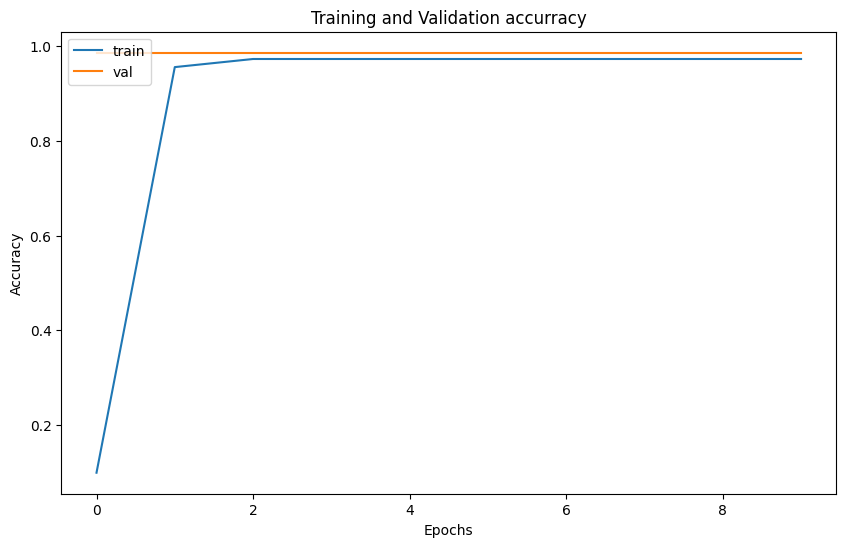

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training and Validation accurracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

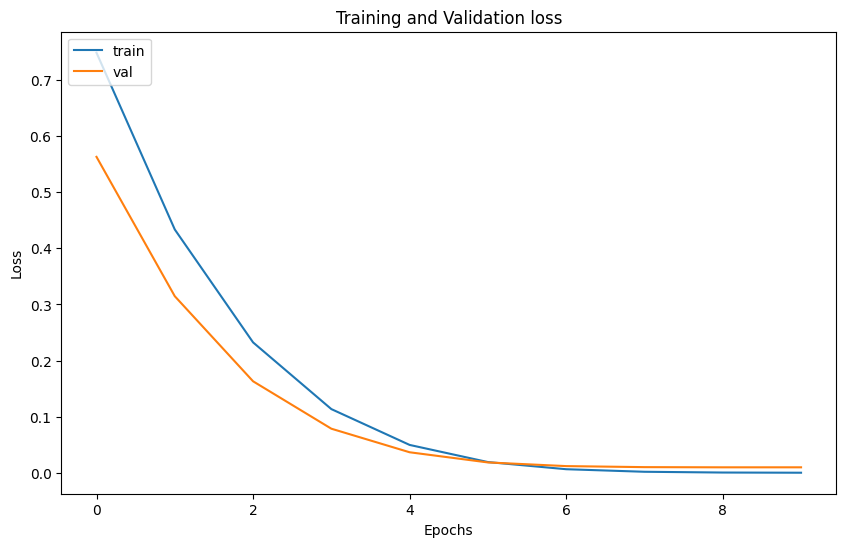

In [26]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
print('Actual values:')
print(' T2M_MAX T2M_MIN RH2M PRECTOTCORR PS WS10M_RANGE')
print(pd.DataFrame(actual_y_pred))

print('Predicted values')
print('T2M_MAX T2M_MIN RH2M PRECTOTCORR PS WS10M_RANGE')
print(pd.DataFrame(y_pred))

Actual values:
 T2M_MAX T2M_MIN RH2M PRECTOTCORR PS WS10M_RANGE
          0       1       2       3       4       5
0     28.84   26.34   89.44    2.24  100.80    0.95
1     29.27   26.70   87.94    3.97  100.78    1.05
2     28.90   26.07   86.50    2.88  100.78    1.02
3     29.78   26.19   86.25    2.98  100.73    1.37
4     29.69   26.38   87.12    4.24  100.64    1.16
..      ...     ...     ...     ...     ...     ...
578   28.88   20.81   62.06    0.00  100.88    2.57
579   29.15   21.19   67.00    0.00  100.87    2.03
580 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00
581 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00
582 -999.00 -999.00 -999.00 -999.00 -999.00 -999.00

[583 rows x 6 columns]
Predicted values
T2M_MAX T2M_MIN RH2M PRECTOTCORR PS WS10M_RANGE
             0          1         2         3         4         5
0    23.064344  19.009352  79.47332  2.748861  94.48407 -3.838444
1    23.064344  19.009352  79.47332  2.748861  94.48407 -3.838444
2    23.064344  19.009352

In [28]:
# Evaluating the model
scores = model.evaluate(actual_y_pred, y_pred, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print(f"{model.metrics_names[1]}: {scores[1]*100}")

accuracy: 100.00%


In [29]:
T = range(y_pred.shape[0])

Text(0, 0.5, 'Temperature')

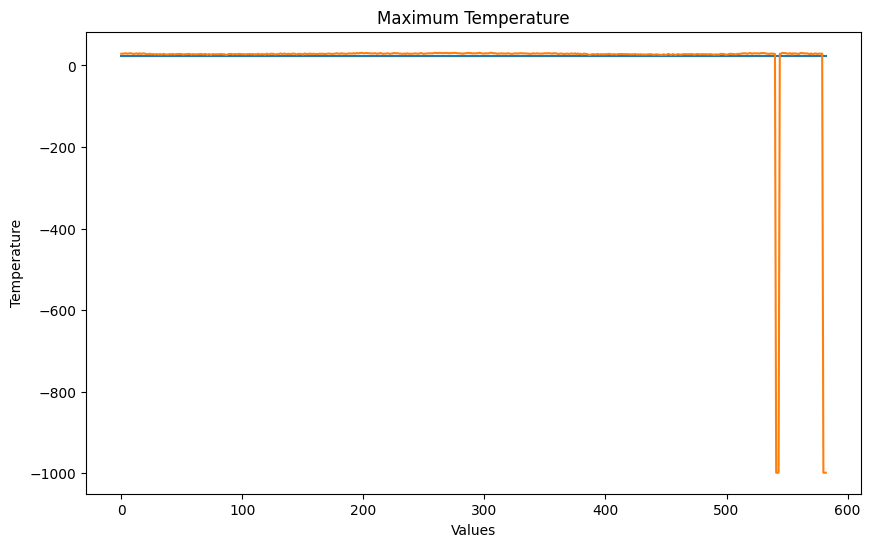

In [30]:
plt.plot(T, y_pred[:,0])
plt.plot(T, actual_y_pred[:,0])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Maximum Temperature')
plt.xlabel('Values')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

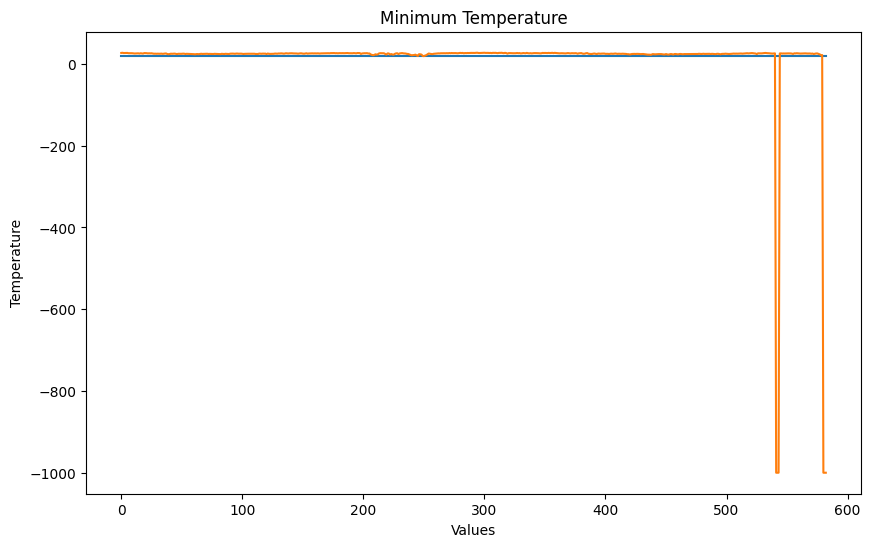

In [31]:
plt.plot(T, y_pred[:,1])
plt.plot(T, actual_y_pred[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Minimum Temperature')
plt.xlabel('Values')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

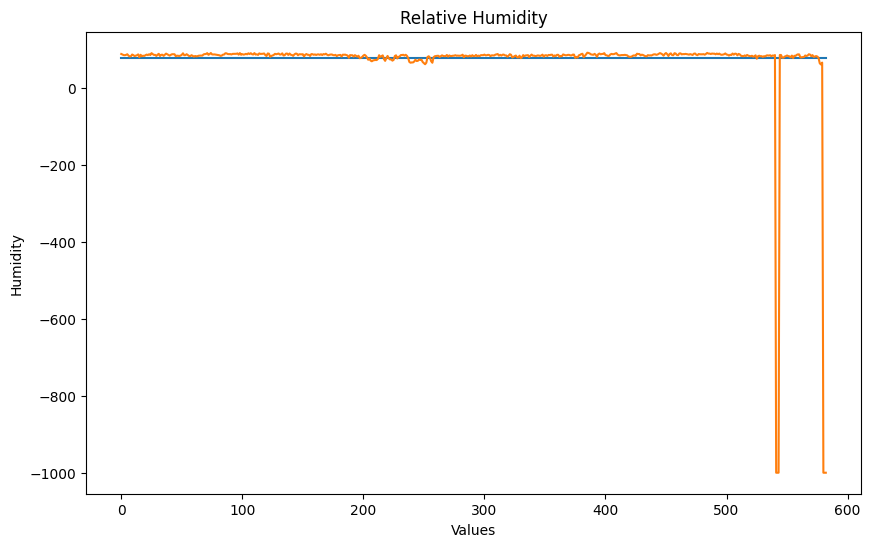

In [32]:
plt.plot(T, y_pred[:,2])
plt.plot(T, actual_y_pred[:,2])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Relative Humidity')
plt.xlabel('Values')
plt.ylabel('Humidity')

Text(0, 0.5, 'Precipitation')

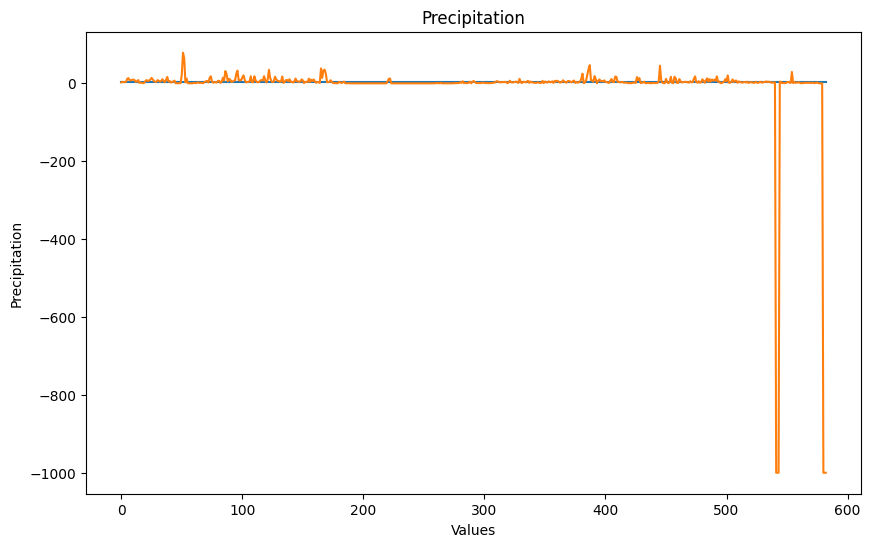

In [33]:
plt.plot(T, y_pred[:,3])
plt.plot(T, actual_y_pred[:,3])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Precipitation')
plt.xlabel('Values')
plt.ylabel('Precipitation')

Text(0, 0.5, 'Surface Pressure')

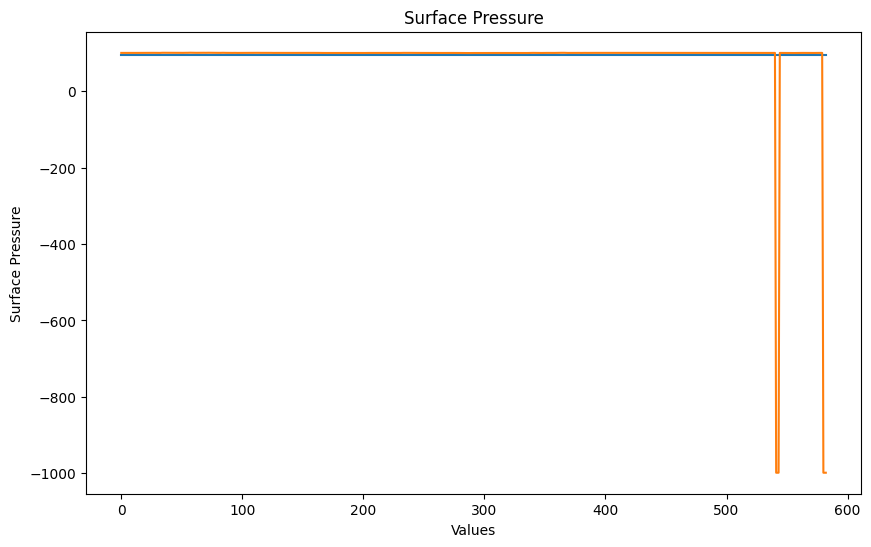

In [34]:
plt.plot(T, y_pred[:,4])
plt.plot(T, actual_y_pred[:,4])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Surface Pressure')
plt.xlabel('Values')
plt.ylabel('Surface Pressure')

Text(0, 0.5, 'Wind Speed')

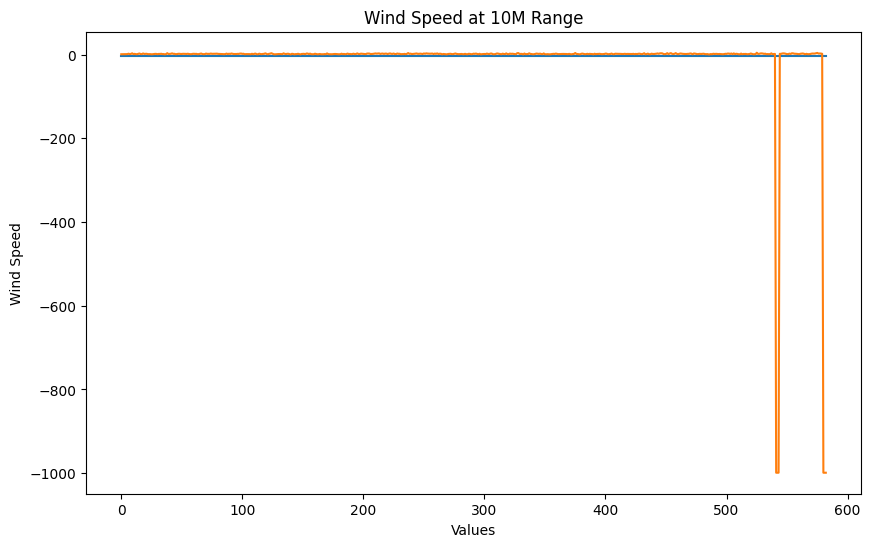

In [35]:
plt.plot(T, y_pred[:,5])
plt.plot(T, actual_y_pred[:,5])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Wind Speed at 10M Range')
plt.xlabel('Values')
plt.ylabel('Wind Speed')

In [36]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=False)

# Iterate through cv splits
result = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    #Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    result.append((prediction, tt))

8/8 [==============================] - 0s 3ms/step


In [37]:
print(df.tail())

input_data = []

print("Enter the weather parameters of previous day")

attr1 = float(input("Enter Maximum Temperature: "))
attr2 = float(input("Enter Manimum Temperature: "))
attr3 = float(input("Enter Relative Humidity: "))
attr4 = float(input("Enter Precipitation: "))
attr5 = float(input("Enter Surface Pessure: "))
attr6 = float(input("Enter Wind Speed at 10M Range: "))

input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr4)
input_data.append(attr5)
input_data.append(attr6)

input_data = np.array(input_data)
input_data.shape = (1, 6)
print("Input Data: ", input_data)

input_data = scaler.transform(input_data)
print('Scaled Input Data: ', input_data)

pred1 = model.predict(input_data)
pred2 = scaler.inverse_transform(pred1)
print("Predicted Data: ")
pd.DataFrame(pred2)

          T2M_MAX  T2M_MIN    RH2M  PRECTOTCORR      PS  WS10M_RANGE
DATE                                                                
2022/359    28.88    20.81   62.06          0.0  100.88         2.57
2022/360    29.15    21.19   67.00          0.0  100.87         2.03
2022/361  -999.00  -999.00 -999.00       -999.0 -999.00      -999.00
2022/362  -999.00  -999.00 -999.00       -999.0 -999.00      -999.00
2022/363  -999.00  -999.00 -999.00       -999.0 -999.00      -999.00
Enter the weather parameters of previous day
Enter Maximum Temperature: 28.88
Enter Manimum Temperature: 20.81
Enter Relative Humidity: 62.06
Enter Precipitation: 0.0
Enter Surface Pessure: 100.88
Enter Wind Speed at 10M Range: 1.57
Input Data:  [[ 28.88  20.81  62.06   0.   100.88   1.57]]
Scaled Input Data:  [[0.99679978 0.99348271 0.97094646 0.85743713 0.99957286 0.99680209]]
1/1 [==============================] - 0s 54ms/step
Predicted Data: 


C:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5
0,28.63739,24.573807,85.078255,4.009155,100.601074,1.624389
